# Customer Data Analysis and Visualization for Sprocket Central Ltd (KPMG Project)

## Problem Statement
This project, assigned by KPMG, focuses on performing analysis and visualization of customer data for Sprocket Central Ltd. The primary goal is to extract valuable insights from the provided dataset in order to guide business decisions for Sprocket Central Ltd. The dataset, stored in a CSV file named "customer_data.csv," contains comprehensive information about the customers associated with the company. The main challenge is to effectively explore and interpret the data to gain a deeper understanding of customer demographics, preferences, and behavior patterns.

## Approach
The approach taken to address this challenge involves a series of steps, encompassing data loading, data cleaning, exploratory data analysis (EDA), customer segmentation, and advanced visualization. The implementation leverages Python and essential libraries including Pandas, Matplotlib, and Seaborn.

The process begins with loading the raw customer data from the CSV file using Pandas' `read_csv` function. This lays the foundation for subsequent analysis. Basic information about the dataset's structure is revealed using the `info` and `head` functions, allowing an initial grasp of the data's characteristics.

Data cleaning and preprocessing play a pivotal role in the analysis. Missing values in categorical columns such as 'Gender' and 'Payment Method' are handled by replacing them with appropriate placeholders using the `fillna` method. Further insights into the categorical columns are obtained by displaying the count of unique values in each column.

Exploratory data analysis (EDA) is crucial to understanding the data's distribution and trends. This is achieved by visualizing the age distribution using a histogram. Additionally, a count plot is employed to illustrate customer distribution by gender and payment method, providing insights into the composition of the customer base.

To gain deeper insights, customer segmentation based on age categories is introduced. A custom function, `calculate_age`, transforms the 'DOB' (date of birth) column into categories like 'Youth,' 'Young Adults,' 'Middle-Aged,' and 'Seniors.' A corresponding visualization using Seaborn's count plot showcases the distribution of customers across these age segments, considering gender as well.

More advanced visualization techniques are employed to uncover nuanced insights. A violin plot, for instance, is used to visualize the distribution of customer ages by gender, aiding in identifying potential trends or patterns associated with age and gender.

The final step involves exporting visualizations for communication and reporting. For instance, a bar plot is created using Seaborn to depict the average spending score by age category and gender. This plot can be saved as an image file for integration into presentations or reports.

## Conclusion
By systematically integrating these steps, the project effectively achieves the goal of customer data analysis and visualization for Sprocket Central Ltd. This holistic approach facilitates a comprehensive understanding of customer demographics, preferences, and behaviors, which in turn informs strategic business decisions for the company. The combination of data analysis and visualization allows for the identification of patterns, trends, and potential areas for improvement. Ultimately, this process contributes to elevated customer satisfaction and the overall growth of Sprocket Central Ltd's business.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# DATA CLEANING

In [2]:
# Load data from an Excel file into a DataFrame
KPMG_trans = pd.read_excel('/Users/user/DATA SETS/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
KPMG_trans.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# Display basic information about the DataFrame
KPMG_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# Convert the 'product_first_sold_date' column to proper datetime format
KPMG_trans['product_first_sold_date']= pd.to_datetime(KPMG_trans['product_first_sold_date']).dt.date

In [5]:
# Display the first few rows of the DataFrame after the date conversion
KPMG_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [6]:
# Display descriptive statistics of numeric columns
KPMG_trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [7]:
# Check for missing values in the DataFrame
KPMG_trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
# Display the unique values in the 'online_order' column
KPMG_trans['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [9]:
# Display the unique values in the 'order_status' column
KPMG_trans['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [10]:
# Check for duplicated rows in the DataFrame
Dup = KPMG_trans.duplicated()
KPMG_trans[Dup].sum()

/var/folders/45/hc7dbtd95lqcnrq8m0lsjdsm0000gn/T/ipykernel_16116/2928432937.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  KPMG_trans[Dup].sum()


transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [11]:
# Load the NewCustomerList sheet from an Excel file
cust_list= pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList')
cust_list.head()


/var/folders/45/hc7dbtd95lqcnrq8m0lsjdsm0000gn/T/ipykernel_16116/2410002619.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_list= pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.78,0.975,1.21875,1.035937,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.85,0.850,1.06250,0.903125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.40,0.400,0.40000,0.400000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.58,0.725,0.72500,0.725000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.01,1.010,1.26250,1.262500,4,4,1.703125


In [12]:
# Display basic information about the DataFrame
cust_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [13]:
# Drop unnecessary columns from the DataFrame
cols= ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
cust_list= cust_list.drop(cols,axis=1)

In [14]:
# Display descriptive statistics of the DataFrame
cust_list.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [15]:
# Check for missing values in the DataFrame
cust_list.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [16]:
# Check for duplicated rows in the DataFrame
cust_list.duplicated().sum()

0

In [17]:
cust_list.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [18]:
# Display the unique values in the 'gender' column
cust_list['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [19]:
# Load the CustomerDemographic sheet from an Excel file
cust_demo = KPMG = pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic')
cust_demo.head()


/var/folders/45/hc7dbtd95lqcnrq8m0lsjdsm0000gn/T/ipykernel_16116/3543132234.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_demo = KPMG = pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [20]:
# Drop the 'default' column from the DataFrame
cust_demo=cust_demo.drop('default',axis=1)

In [21]:
# Display descriptive statistics of the DataFrame
cust_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [22]:

cust_demo.duplicated().sum()


0

In [23]:
cust_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [24]:
# Check for missing values in the DataFrame
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [25]:
# Display the unique values in the 'gender' column
cust_demo['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [26]:
# Replace gender values with consistent values
cust_demo['gender']=cust_demo['gender'].replace('F','Female').replace('Femal' 'Female').replace('M','Male').replace('U','Unspecified')

In [27]:
cust_demo['gender'].value_counts()


Female         2038
Male           1873
Unspecified      88
Femal             1
Name: gender, dtype: int64

In [28]:
# Calculate customers' ages using the current date and birth date
current_date = datetime.now()
cust_demo['Age'] = ( current_date - cust_demo['DOB']) // pd.Timedelta(days=365.25)

In [29]:
cust_demo['Age']

0       69.0
1       42.0
2       69.0
3       61.0
4       46.0
        ... 
3995    47.0
3996    21.0
3997     NaN
3998    49.0
3999    31.0
Name: Age, Length: 4000, dtype: float64

In [30]:
# Drop unnecessary columns from the DataFrame
cols= ['DOB']
cust_demo= cust_demo.drop(cols,axis=1)

In [31]:
# Display the first few rows of the DataFrame
cust_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69.0
3,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,No,7.0,61.0
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,VP Product Management,Health,Mass Customer,N,No,19.0,47.0
3996,3997,Blanch,Nisuis,Female,87,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,21.0
3997,3998,Sarene,Woolley,Unspecified,60,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN
3998,3999,Patrizius,NaN,Male,11,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,49.0


In [32]:
# Remove rows where 'deceased_indicator' is 'Y'

values= cust_demo.loc[cust_demo['deceased_indicator'] == 'Y']
#cust_demo = cust_demo.drop(values,axis=0)

values

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
752,753,Josy,St. Quentin,Female,82,Food Chemist,Health,Affluent Customer,Y,Yes,6.0,53.0
3789,3790,Kurtis,Morson,Male,91,Senior Editor,Retail,Mass Customer,Y,Yes,9.0,64.0


In [33]:
cust_demo = cust_demo.drop([752, 3789])


In [34]:
#Load the transaction sheet from the excel file
KPMG_trans = pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
KPMG_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [35]:
# Sort the KPMG_trans DataFrame based on the 'customer_id' column
KPMG_trans = KPMG_trans.sort_values('customer_id')


In [36]:
KPMG_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.880000,33455.0
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.960000,35378.0
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400000,37838.0
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,37823.0
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,41245.0
8415,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,36668.0
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0


In [37]:
# Calculate the profit for each transaction and add it as a new column
KPMG_trans['profit']= KPMG_trans['list_price'] - KPMG_trans['standard_cost']
KPMG_trans['profit']

14485     75.750000
18969    509.970000
16422     75.140000
5156     189.280000
13423     17.870000
            ...    
2462      17.870000
8415     827.160000
8707     104.244984
16700     90.100012
17468     75.139976
Name: profit, Length: 20000, dtype: float64

In [38]:
# Display the first few rows of the DataFrame
KPMG_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
14485,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.880000,33455.0,75.750000
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.960000,35378.0,509.970000
16422,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400000,37838.0,75.140000
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,37823.0,189.280000
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,38573.0,17.870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,41245.0,17.870000
8415,8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,36668.0,827.160000
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0,104.244984
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0,90.100012


In [39]:
# Load the CustomerAddress sheet from an Excel file
cust_add = pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress')
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [40]:
#states = {'New South Wales':'NSW','Victoria':'VIC'}
#cust_add['state'] = cust_add['state'].replace(states)

In [41]:
#cust_add['state'].unique() to find out a figurer in a column

In [42]:
# Replace full state names with abbreviated state codes
cust_add['state']=cust_add['state'].replace('Victoria','VIC').replace('New South Wales' ,'NSW')

In [43]:
# Display the first few rows of the DataFrame
cust_add

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


# MERGING CLEANED DATA

In [44]:
# Merge KPMG_trans, cust_demo, and cust_add DataFrames on 'customer_id'
data = pd.merge(KPMG_trans,cust_demo,on='customer_id').merge(cust_add,on='customer_id')
data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,...,Mass Customer,N,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
1,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
2,16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,...,Mass Customer,N,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
3,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,Mass Customer,N,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,19836,40,3500,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,...,Affluent Customer,N,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19956,14870,22,3500,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,...,Affluent Customer,N,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19957,6309,69,3500,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Affluent Customer,N,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19958,2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,...,Affluent Customer,N,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10


In [45]:
# List of columns to drop from the DataFrame
cols= ['transaction_id','product_first_sold_date','deceased_indicator','online_order','order_status','brand','product_line','product_class','product_size']
# Drop specified columns from the DataFrame
df_clean = data.drop(cols, axis= 1)

In [46]:
# Display the cleaned DataFrame
df_clean

,product_id,customer_id,transaction_date,list_price,standard_cost,profit,first_name,last_name,gender,past_3_years_bike_related_purchases,...,job_industry_category,wealth_segment,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,23,1,2017-03-27,688.63,612.88,75.75,Laraine,Medendorp,Female,93,...,Health,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
1,11,1,2017-03-29,1274.93,764.96,509.97,Laraine,Medendorp,Female,93,...,Health,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
2,9,1,2017-12-09,742.54,667.40,75.14,Laraine,Medendorp,Female,93,...,Health,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
3,47,1,2017-05-11,1720.70,1531.42,189.28,Laraine,Medendorp,Female,93,...,Health,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
4,2,1,2017-02-21,71.49,53.62,17.87,Laraine,Medendorp,Female,93,...,Health,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,40,3500,2017-03-14,1458.17,874.90,583.27,Josy,Fleeman,Female,71,...,Entertainment,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19956,22,3500,2017-01-11,60.34,45.26,15.08,Josy,Fleeman,Female,71,...,Entertainment,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19957,69,3500,2017-01-09,792.90,594.68,198.22,Josy,Fleeman,Female,71,...,Entertainment,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10
19958,2,3500,2017-04-25,71.49,53.62,17.87,Josy,Fleeman,Female,71,...,Entertainment,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10


In [47]:
#df_clean = df_clean.sort_values('transaction_date', ascending = False)


In [48]:
#df_clean

In [49]:
# Calculate the most recent transaction date
recent = df_clean['transaction_date'].max()

In [50]:
recent

Timestamp('2017-12-30 00:00:00')

In [51]:
# Calculate the recency in days for each transaction and add a 'Recency' column
df_clean['Recency'] = (recent - df_clean['transaction_date']).dt.days

In [52]:
# Display the DataFrame with the added 'Recency' column
df_clean

,product_id,customer_id,transaction_date,list_price,standard_cost,profit,first_name,last_name,gender,past_3_years_bike_related_purchases,...,wealth_segment,owns_car,tenure,Age,address,postcode,state,country,property_valuation,Recency
0,23,1,2017-03-27,688.63,612.88,75.75,Laraine,Medendorp,Female,93,...,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,278
1,11,1,2017-03-29,1274.93,764.96,509.97,Laraine,Medendorp,Female,93,...,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,276
2,9,1,2017-12-09,742.54,667.40,75.14,Laraine,Medendorp,Female,93,...,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,21
3,47,1,2017-05-11,1720.70,1531.42,189.28,Laraine,Medendorp,Female,93,...,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,233
4,2,1,2017-02-21,71.49,53.62,17.87,Laraine,Medendorp,Female,93,...,Mass Customer,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,40,3500,2017-03-14,1458.17,874.90,583.27,Josy,Fleeman,Female,71,...,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,291
19956,22,3500,2017-01-11,60.34,45.26,15.08,Josy,Fleeman,Female,71,...,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,353
19957,69,3500,2017-01-09,792.90,594.68,198.22,Josy,Fleeman,Female,71,...,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,355
19958,2,3500,2017-04-25,71.49,53.62,17.87,Josy,Fleeman,Female,71,...,Affluent Customer,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,249


In [53]:
# Create a new table using pivot_table to summarize customer data
new_table = pd.pivot_table(df_clean, values=['Recency', 'product_id','profit'], index='customer_id', aggfunc={'Recency': 'min', 'product_id': 'count','profit':'sum'})


In [54]:
# Display the new summarized table
new_table

,Recency,product_id,profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


# CONDUCTING RFM ANALYSIS

In [59]:
# Calculate the minimum and maximum values of Recency
r_min = new_table['Recency'].min()
r_max = new_table['Recency'].max()


In [60]:
# Calculate quartiles for Recency
r_quartiles = new_table['Recency'].quantile(q=[0,0.25, 0.5, 0.75,1])


In [61]:
# Display the quartiles for Recency
r_quartiles

0.00      0.0
0.25     17.0
0.50     44.0
0.75     85.0
1.00    353.0
Name: Recency, dtype: float64

In [62]:
# Define labels for Recency quartiles
r_labels = [4,3,2,1]
# Assign Recency scores to customers based on quartiles
new_table['r_score'] = pd.cut(new_table['Recency'], bins=r_quartiles, labels=r_labels, include_lowest=True)


In [63]:
# Convert Recency scores to integers
new_table['r_score'] = new_table['r_score'].astype(int)


In [109]:
# Rename 'product_id' and 'profit' columns
new_table= new_table.rename(columns={'product_id':'frequency','profit':'monetary'})


In [110]:
# Display the updated DataFrame
new_table

,Recency,frequncy,monetary,r_score,f_score,m_score,rfm_value,title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
6,64,5,3946.55,2,2,3,223,Silver
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


In [66]:
# Calculate quartiles for Frequency
f_min = new_table['product_id'].min()
f_max = new_table['product_id'].max()
f_quartiles = new_table['product_id'].quantile(q=[0, 0.25, 0.5, 0.75, 1])


In [67]:

f_quartiles

0.00     1.0
0.25     4.0
0.50     6.0
0.75     7.0
1.00    14.0
Name: product_id, dtype: float64

In [68]:
# Define labels for Frequency quartiles
f_labels = [1, 2, 3, 4]
# Assign Frequency scores to customers based on quartiles
new_table['f_score'] = pd.cut(new_table['product_id'], bins=f_quartiles, labels=f_labels, include_lowest=True)


In [69]:
# Convert Frequency scores to integers
new_table['f_score'] = new_table['f_score'].astype(int)

In [70]:
new_table

,Recency,product_id,profit,r_score,f_score
customer_id,,,,,
1,7,11,3018.09,4,4
2,128,3,2226.26,1,1
4,195,2,220.57,1,1
5,16,6,2394.94,4,2
6,64,5,3946.55,2,2
...,...,...,...,...,...
3496,256,4,2045.84,1,1
3497,52,3,1648.32,2,1
3498,127,6,3147.33,1,2


In [71]:
# Calculate quartiles for Monetary
m_min = new_table['profit'].min()
m_max = new_table['profit'].max()
m_quartiles = new_table['profit'].quantile(q=[0, 0.25, 0.5, 0.75, 1])


In [72]:
m_quartiles

0.00       15.0800
0.25     1841.2050
0.50     2859.7150
0.75     4179.8825
1.00    11668.9500
Name: profit, dtype: float64

In [73]:
# Define labels for Monetary quartiles
m_labels = [1, 2, 3, 4]
# Assign Monetary scores to customers based on quartiles
new_table['m_score'] = pd.cut(new_table['profit'], bins=m_quartiles, labels=m_labels, include_lowest=True)


In [74]:
# Convert Monetary scores to integers
new_table['m_score'] = new_table['m_score'].astype(int)

In [75]:
new_table

,Recency,product_id,profit,r_score,f_score,m_score
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
6,64,5,3946.55,2,2,3
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [76]:
new_table.dtypes

Recency         int64
product_id      int64
profit        float64
r_score         int64
f_score         int64
m_score         int64
dtype: object

In [77]:
# Define weights for RFM values
r_weight = 100
f_weight = 10
m_weight = 0.0


In [78]:
# Calculate RFM value based on weights
new_table['rfm_value'] = (new_table['r_score'] * r_weight) + (new_table['f_score'] * f_weight) + (new_table['m_score'])


In [79]:
new_table

,Recency,product_id,profit,r_score,f_score,m_score,rfm_value
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422
6,64,5,3946.55,2,2,3,223
...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112
3497,52,3,1648.32,2,1,1,211
3498,127,6,3147.33,1,2,3,123


# SEGMENT ANALYSIS

<AxesSubplot:>

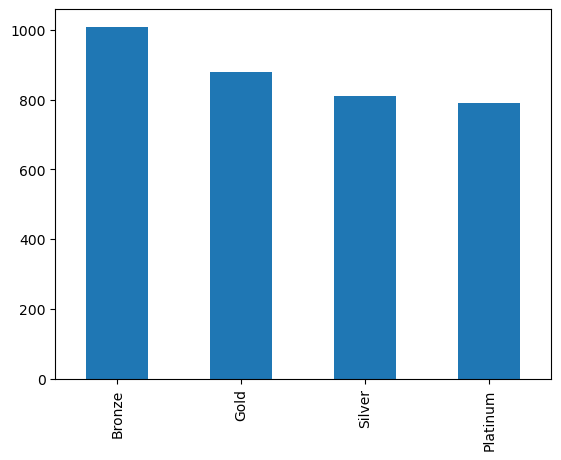

In [102]:
# Segment analysis
# Creating RFM segments based on the calculated RFM values
rfm_segments = pd.qcut(new_table['rfm_value'], q=4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
new_table['title'] = rfm_segments
# Counting the number of customers in each segment
segment_counts = new_table['title'].value_counts()
# Plotting a bar chart to visualize the distribution of customers in each segment
segment_counts.plot(kind='bar')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers in RFM Segments')
plt.show()


# DATA VIZ USING MATPLOTLIB

In [84]:
# Creating a pivot table to summarize the RFM values by title (segment)
new_table2 = pd.pivot_table(new_table, values=['rfm_value'], index='title', aggfunc={'rfm_value': 'sum'})

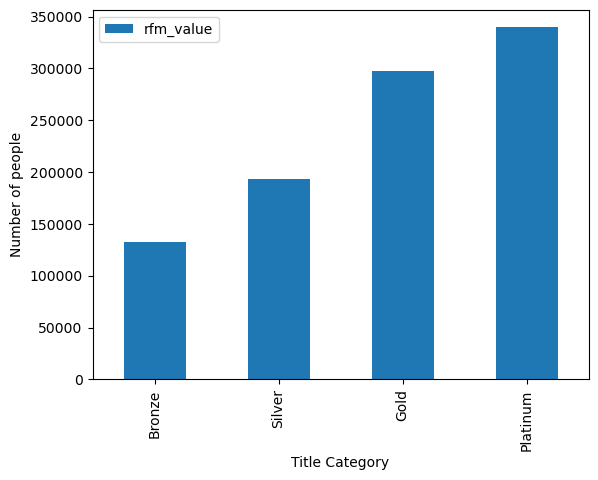

In [85]:
# Plotting a bar chart to visualize the total RFM values in each segment
new_table2.plot(kind='bar')
plt.xlabel('Title Category')
plt.ylabel('Number of people')
plt.show()


In [86]:
# Creating another pivot table to summarize the count of customers in each RFM segment
new_table3 = pd.pivot_table(new_table, values=['rfm_value'], columns='title', aggfunc={'rfm_value': 'count'})

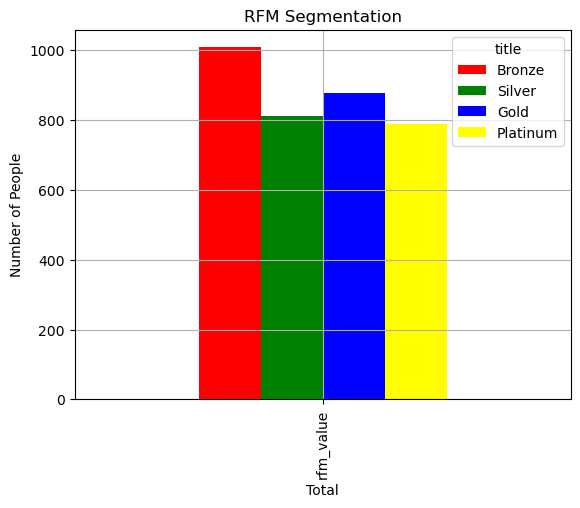

In [87]:
# Defining color codes for each segment
color_list = ['red', 'green', 'blue', 'yellow']

# Plotting a bar chart to visualize the count of customers in each RFM segment
new_table3.plot(kind='bar',color = color_list)
plt.xlabel('Total')
plt.ylabel('Number of People')
plt.title('RFM Segmentation')
plt.grid(True)


plt.show()


In [88]:
# Age Categorization
# Defining age categories
age_categories = {
    (18, 30): '18-30',
    (31, 40): '31-40',
    (41, 50): '41-50',
    (51,60):  '51-60',
    (61,70): '61-70',
    (71,80): '71-80',
    (81,90): '81-90',
    (91,100):'91-100',
}


In [89]:
# Function to categorize age
def categorize_age(age):
    for age_range, category in age_categories.items():
        if age_range[0] <= age <= age_range[1]:
            return category
    return 'Unknown'  


In [90]:
# Applying age categorization to the 'Age' column and creating a new 'age_category' column
df_clean['age_category'] = df_clean['Age'].apply(categorize_age)


In [91]:
# Displaying the modified DataFrame with the new 'age_category' column
df_clean

,product_id,customer_id,transaction_date,list_price,standard_cost,profit,first_name,last_name,gender,past_3_years_bike_related_purchases,...,owns_car,tenure,Age,address,postcode,state,country,property_valuation,Recency,age_category
0,23,1,2017-03-27,688.63,612.88,75.75,Laraine,Medendorp,Female,93,...,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,278,61-70
1,11,1,2017-03-29,1274.93,764.96,509.97,Laraine,Medendorp,Female,93,...,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,276,61-70
2,9,1,2017-12-09,742.54,667.40,75.14,Laraine,Medendorp,Female,93,...,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,21,61-70
3,47,1,2017-05-11,1720.70,1531.42,189.28,Laraine,Medendorp,Female,93,...,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,233,61-70
4,2,1,2017-02-21,71.49,53.62,17.87,Laraine,Medendorp,Female,93,...,Yes,11.0,69.0,060 Morning Avenue,2016,NSW,Australia,10,312,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,40,3500,2017-03-14,1458.17,874.90,583.27,Josy,Fleeman,Female,71,...,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,291,51-60
19956,22,3500,2017-01-11,60.34,45.26,15.08,Josy,Fleeman,Female,71,...,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,353,51-60
19957,69,3500,2017-01-09,792.90,594.68,198.22,Josy,Fleeman,Female,71,...,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,355,51-60
19958,2,3500,2017-04-25,71.49,53.62,17.87,Josy,Fleeman,Female,71,...,No,17.0,55.0,9491 Green Ridge Terrace,2100,NSW,Australia,10,249,51-60


In [92]:
# Creating a pivot table to summarize profit by age category and wealth segment
new_table4 = pd.pivot_table(df_clean, values='profit',index='age_category', columns='wealth_segment', aggfunc={'profit': 'sum'})

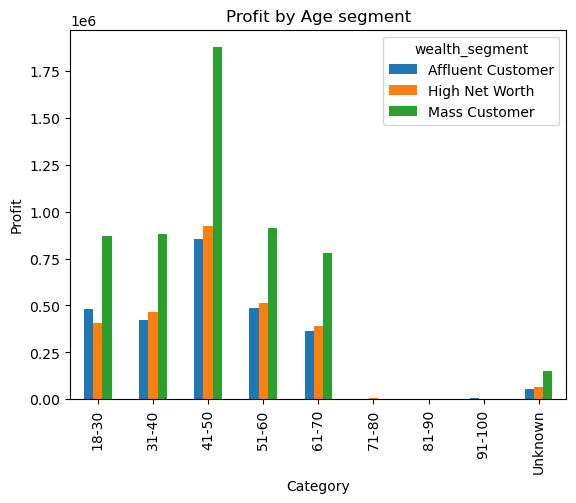

In [93]:
# Plotting a bar chart to visualize profit by age category and wealth segment
new_table4.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit by Age segment')
plt.show()

In [95]:
# Creating a pivot table to summarize the count of customers owning cars by state
new_table6 = pd.pivot_table(df_clean, index='state',values= 'first_name' ,columns='owns_car', aggfunc={'first_name':'count'})

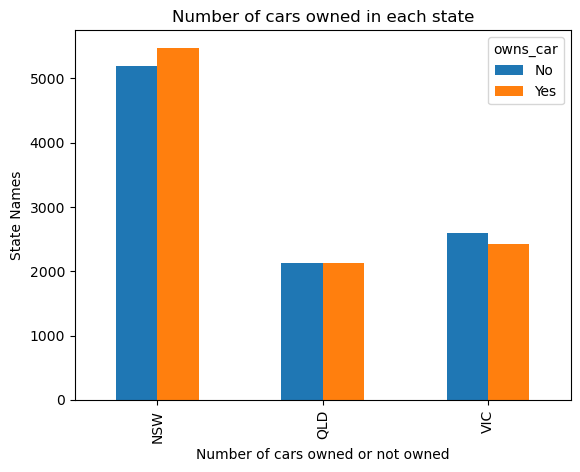

In [96]:
# Plotting a bar chart to visualize the number of customers owning cars in each state
new_table6.plot(kind='bar')
plt.xlabel('Number of cars owned or not owned')
plt.ylabel('State Names')
plt.title('Number of cars owned in each state')
plt.show()


In [97]:
# Creating a pivot table to summarize bike-related purchases based on job industry category
new_table7 = pd.pivot_table(df_clean, index='job_industry_category',values= 'past_3_years_bike_related_purchases' , aggfunc={'past_3_years_bike_related_purchases':'count'})

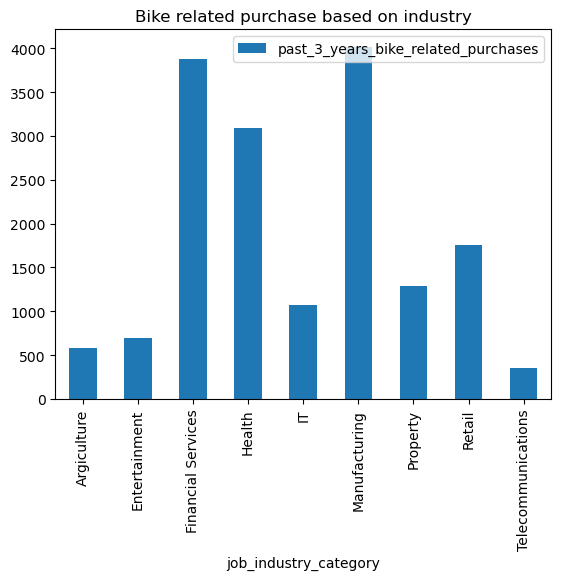

In [98]:
# Plotting a bar chart to visualize bike-related purchases based on job industry category
new_table7.plot(kind='bar')
plt.title('Bike related purchase based on industry')
plt.show()

In [99]:
# Creating a pivot table to summarize profit based on job industry category
new_table8 = pd.pivot_table(df_clean, index='job_industry_category',values= 'profit' , aggfunc={'profit':'sum'})

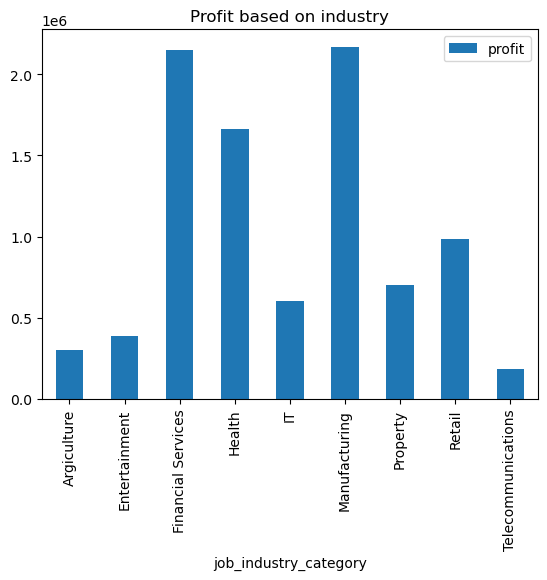

In [100]:
# Plotting a bar chart to visualize profit based on job industry category
new_table8.plot(kind='bar')
plt.title('Profit based on industry')
plt.show()

In [119]:
# Merging the cleaned data with the RFM analysis results based on customer_id
new_list = pd.merge(df_clean,new_table,on='customer_id')
new_list

,product_id,customer_id,transaction_date,list_price,standard_cost,profit,first_name,last_name,gender,past_3_years_bike_related_purchases,...,Recency_x,age_category,Recency_y,frequncy,monetary,r_score,f_score,m_score,rfm_value,title
0,23,1,2017-03-27,688.63,612.88,75.75,Laraine,Medendorp,Female,93,...,278,61-70,7,11,3018.09,4,4,3,443,Platinum
1,11,1,2017-03-29,1274.93,764.96,509.97,Laraine,Medendorp,Female,93,...,276,61-70,7,11,3018.09,4,4,3,443,Platinum
2,9,1,2017-12-09,742.54,667.40,75.14,Laraine,Medendorp,Female,93,...,21,61-70,7,11,3018.09,4,4,3,443,Platinum
3,47,1,2017-05-11,1720.70,1531.42,189.28,Laraine,Medendorp,Female,93,...,233,61-70,7,11,3018.09,4,4,3,443,Platinum
4,2,1,2017-02-21,71.49,53.62,17.87,Laraine,Medendorp,Female,93,...,312,61-70,7,11,3018.09,4,4,3,443,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,40,3500,2017-03-14,1458.17,874.90,583.27,Josy,Fleeman,Female,71,...,291,51-60,144,6,1785.86,1,2,1,121,Bronze
19956,22,3500,2017-01-11,60.34,45.26,15.08,Josy,Fleeman,Female,71,...,353,51-60,144,6,1785.86,1,2,1,121,Bronze
19957,69,3500,2017-01-09,792.90,594.68,198.22,Josy,Fleeman,Female,71,...,355,51-60,144,6,1785.86,1,2,1,121,Bronze
19958,2,3500,2017-04-25,71.49,53.62,17.87,Josy,Fleeman,Female,71,...,249,51-60,144,6,1785.86,1,2,1,121,Bronze


In [122]:
 #Formatting the 'profit' column to display currency format
format_currency = lambda x: '${:,.2f}'.format(x)
new_list['profit'] = new_list['profit'].apply(format_currency)

In [123]:
new_list

,product_id,customer_id,transaction_date,list_price,standard_cost,profit,first_name,last_name,gender,past_3_years_bike_related_purchases,...,Recency_x,age_category,Recency_y,frequncy,monetary,r_score,f_score,m_score,rfm_value,title
0,23,1,2017-03-27,688.63,612.88,$75.75,Laraine,Medendorp,Female,93,...,278,61-70,7,11,3018.09,4,4,3,443,Platinum
1,11,1,2017-03-29,1274.93,764.96,$509.97,Laraine,Medendorp,Female,93,...,276,61-70,7,11,3018.09,4,4,3,443,Platinum
2,9,1,2017-12-09,742.54,667.40,$75.14,Laraine,Medendorp,Female,93,...,21,61-70,7,11,3018.09,4,4,3,443,Platinum
3,47,1,2017-05-11,1720.70,1531.42,$189.28,Laraine,Medendorp,Female,93,...,233,61-70,7,11,3018.09,4,4,3,443,Platinum
4,2,1,2017-02-21,71.49,53.62,$17.87,Laraine,Medendorp,Female,93,...,312,61-70,7,11,3018.09,4,4,3,443,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19955,40,3500,2017-03-14,1458.17,874.90,$583.27,Josy,Fleeman,Female,71,...,291,51-60,144,6,1785.86,1,2,1,121,Bronze
19956,22,3500,2017-01-11,60.34,45.26,$15.08,Josy,Fleeman,Female,71,...,353,51-60,144,6,1785.86,1,2,1,121,Bronze
19957,69,3500,2017-01-09,792.90,594.68,$198.22,Josy,Fleeman,Female,71,...,355,51-60,144,6,1785.86,1,2,1,121,Bronze
19958,2,3500,2017-04-25,71.49,53.62,$17.87,Josy,Fleeman,Female,71,...,249,51-60,144,6,1785.86,1,2,1,121,Bronze


In [136]:
# Saving the merged and formatted data to an Excel file named 'KPMG.xlsx'
with pd.ExcelWriter('KPMG.xlsx') as writer:
    new_list.to_excel(writer,sheet_name='cleaned data',index = False)

In [126]:
# Reading the 'NewCustomerList' sheet from an Excel file named 'KPMG_VI_New_raw_data_update_final.xlsx' into a DataFrame
df_new = pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= "NewCustomerList")
df_new

/var/folders/45/hc7dbtd95lqcnrq8m0lsjdsm0000gn/T/ipykernel_16116/2245645669.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_new = pd.read_excel('/Users/user/Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= "NewCustomerList")


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.78,0.9750,1.218750,1.035937,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.85,0.8500,1.062500,0.903125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.40,0.4000,0.400000,0.400000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.58,0.7250,0.725000,0.725000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.01,1.0100,1.262500,1.262500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.69,0.6900,0.690000,0.690000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.42,0.4200,0.525000,0.446250,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.66,0.8250,0.825000,0.825000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.88,1.1000,1.100000,0.935000,997,997,0.357000


In [127]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [128]:
#dropping 'address' column
columns_to_drop = ['address']
df_new = df_new.drop(columns_to_drop, axis=1)
df_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.78,0.9750,1.218750,1.035937,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.85,0.8500,1.062500,0.903125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.40,0.4000,0.400000,0.400000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.58,0.7250,0.725000,0.725000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.01,1.0100,1.262500,1.262500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.69,0.6900,0.690000,0.690000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.42,0.4200,0.525000,0.446250,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.66,0.8250,0.825000,0.825000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.88,1.1000,1.100000,0.935000,997,997,0.357000


In [129]:
# Replace 'state' abbreviations with full state names
rep = {'NSW':'New South Wales', 'VIC':'Victoria', 'QLD':'Queensland'}
df_new['state'] = df_new['state'].replace(rep)

In [130]:
# Calculate age using current date and 'DOB' column
current_date = datetime.now()
df_new['Age'] = (current_date - df_new['DOB']) // pd.Timedelta(days=365.25)
df_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.78,0.9750,1.218750,1.035937,1,1,1.718750,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.85,0.8500,1.062500,0.903125,1,1,1.718750,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.40,0.4000,0.400000,0.400000,1,1,1.718750,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.58,0.7250,0.725000,0.725000,4,4,1.703125,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,1.01,1.0100,1.262500,1.262500,4,4,1.703125,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,0.69,0.6900,0.690000,0.690000,996,996,0.374000,63.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.42,0.4200,0.525000,0.446250,997,997,0.357000,21.0
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.66,0.8250,0.825000,0.825000,997,997,0.357000,68.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,0.88,1.1000,1.100000,0.935000,997,997,0.357000,70.0


In [131]:
# Filter data based on specified conditions
df_neww = df_new[((df_new['Age'] >= 38) & (df_new['Age'] <= 47) & (df_new['wealth_segment'] == 'Mass Customer') & ((df_new['job_industry_category'] == 'Financial Services') | (df_new['job_industry_category'] == 'Health') | (df_new['job_industry_category'] == 'Manufacturing')))]

In [132]:
df_neww

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,...,Australia,7,1.07,1.0700,1.070000,0.909500,6,6,1.671875,46.0
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,...,Australia,10,0.64,0.6400,0.800000,0.680000,14,14,1.593750,46.0
17,Winnifred,Beswetherick,Female,83,1976-06-08,Actuary,Financial Services,Mass Customer,N,No,...,Australia,10,0.43,0.4300,0.537500,0.456875,17,17,1.546875,47.0
24,Brena,Schnitter,Female,78,1982-10-11,Account Executive,Manufacturing,Mass Customer,N,No,...,Australia,5,0.67,0.6700,0.670000,0.569500,25,25,1.484375,40.0
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,Australia,8,0.48,0.4800,0.480000,0.408000,38,38,1.437500,44.0
41,Colene,Fishleigh,Female,24,1985-03-14,Design Engineer,Financial Services,Mass Customer,N,No,...,Australia,10,0.85,0.8500,1.062500,0.903125,42,42,1.421875,38.0
48,Gale,Disbrow,Female,59,1977-05-14,Cost Accountant,Financial Services,Mass Customer,N,Yes,...,Australia,7,0.85,1.0625,1.062500,0.903125,46,46,1.407812,46.0
55,Martelle,Tuppeny,Female,52,1981-02-03,Marketing Assistant,Manufacturing,Mass Customer,N,No,...,Australia,10,0.85,0.8500,1.062500,0.903125,54,54,1.381250,42.0
82,Esther,Rooson,Female,14,1981-02-22,NaN,Financial Services,Mass Customer,N,No,...,Australia,9,1.01,1.0100,1.262500,1.073125,78,78,1.337500,42.0
91,Patricia,Everix,Female,34,1978-02-19,Director of Sales,Health,Mass Customer,N,No,...,Australia,7,0.48,0.4800,0.480000,0.408000,89,89,1.312500,45.0


In [137]:
# Save the filtered data to a new Excel file
with pd.ExcelWriter("cust.xlsx") as writer:
    df_neww.to_excel(writer, sheet_name='data',index = False)